In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
vaccine = pd.read_csv("h1n1_vaccine_prediction.csv")

In [3]:
vaccine.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
vaccine.tail()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [5]:
vaccine.info


<bound method DataFrame.info of        unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
2              2         1.0             1.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26704      26704         2.0             2.0                   0.0   
26705      26705         1.0             1.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                

In [6]:
vaccine.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [7]:
vaccine.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [17]:
vaccine.drop(['unique_id'], inplace = True, axis = 1)

In [19]:
vaccine.dropna(inplace=True)

In [21]:
vaccine.shape

(11794, 33)

In [23]:
vaccine.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [25]:
vaccine.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

In [27]:
ca = ['age_bracket','qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa']

In [29]:
vaccine.drop(ca, axis=1, inplace=True)

In [31]:
vaccine.shape

(11794, 24)

In [33]:
vaccine.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [35]:
y=vaccine['h1n1_vaccine']
x=vaccine.drop(['h1n1_vaccine'], axis=1)

In [41]:
x_train, x_test, y_train , y_test=train_test_split(x,y, test_size=.25, random_state=88)

In [43]:
log = LogisticRegression()
log.fit(x_train,y_train)
print(f"Training Score : {log.score(x_train, y_train)}")
print(f"Testing Score : {log.score(x_test, y_test)}")

Training Score : 0.8168456755228943
Testing Score : 0.8209562563580874


In [45]:
pred_train=log.predict(x_train)
pred_test=log.predict(x_test)

In [47]:
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0","Pred_1"],
index=["Act_0", "Act_1"])
cnfTrain

,Pred_0,Pred_1
Act_0,5621,529
Act_1,1091,1604


In [49]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      6150
           1       0.75      0.60      0.66      2695

    accuracy                           0.82      8845
   macro avg       0.79      0.75      0.77      8845
weighted avg       0.81      0.82      0.81      8845



In [51]:
cnfTest=pd.DataFrame(metrics.confusion_matrix(y_test , pred_test), columns=["Pred_0", "Pred_1"],
index=["Act_0", "Act_1"])
cnfTest

,Pred_0,Pred_1
Act_0,1899,184
Act_1,344,522


In [53]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2083
           1       0.74      0.60      0.66       866

    accuracy                           0.82      2949
   macro avg       0.79      0.76      0.77      2949
weighted avg       0.82      0.82      0.82      2949



In [55]:
pd.DataFrame(log.predict_proba(x_train), columns=["Prob_0", "Prob_1"])

,Prob_0,Prob_1
0,0.977070,0.022930
1,0.531137,0.468863
2,0.104264,0.895736
3,0.888020,0.111980
4,0.839769,0.160231
...,...,...
8840,0.402866,0.597134
8841,0.862142,0.137858
8842,0.747279,0.252721
8843,0.243316,0.756684


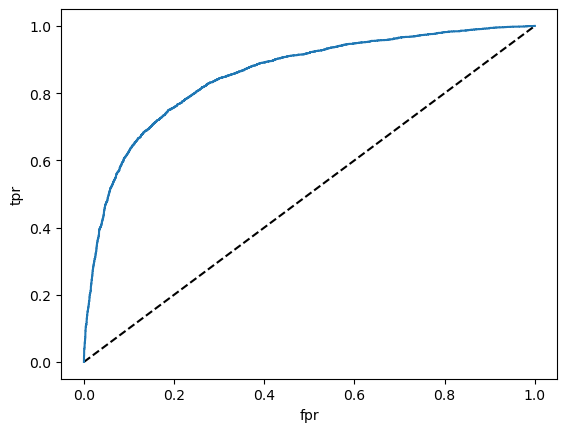

In [57]:
# Receiver Operating Characterestics
probs=log.predict_proba(x_train)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='logistic')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [59]:
metrics.roc_auc_score(y_train,probs)

0.8555175950646334

In [63]:
newtest_pred=np.where(log.predict_proba(x_test)[:,1] > 0.229209326, 1, 0) # based on KS value

In [65]:
cnfNewTest=pd.DataFrame(metrics.confusion_matrix(y_test , newtest_pred), columns=["Pred_0", "Pred_1"],
index=["Act_0", "Act_1"])
cnfNewTest

,Pred_0,Pred_1
Act_0,1505,578
Act_1,142,724


In [67]:
print(metrics.classification_report(y_test , newtest_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      2083
           1       0.56      0.84      0.67       866

    accuracy                           0.76      2949
   macro avg       0.73      0.78      0.74      2949
weighted avg       0.81      0.76      0.77      2949



In [69]:
model_report = pd.DataFrame()
# Your existing code for tmp remains the same
tmp = pd.Series({'Model': " Logical Regression ",
'ROC Score' : metrics.roc_auc_score(y_test, newtest_pred),
'Precision Score': metrics.precision_score(y_test, newtest_pred),
'Recall Score': metrics.recall_score(y_test, newtest_pred),
'F1 Score' : metrics.f1_score(y_test, newtest_pred),
'Accuracy Score': metrics.accuracy_score(y_test, newtest_pred)})
# Append the data to the DataFrame using concat method
model_report = pd.concat([model_report, tmp.to_frame().T], ignore_index=True)
model_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Logical Regression,0.779272,0.556068,0.836028,0.667897,0.755849


In [71]:
param_grid = {
'penalty': ['l1', 'l2'], # Regularization penalty (L1 or L2)
'C': [0.1, 1, 10] # Inverse of regularization strength

}

In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [75]:
# Using GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(estimator=log, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

C:\Users\surek\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\surek\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\surek\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']})

In [77]:
# Getting the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [79]:
# Evaluating the best model on the test set
y_pred = best_model.predict(x_test)

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [83]:
# Calculating evaluation metrics for the tuned model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [85]:
# Printing the evaluation metrics and best parameters
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.8206171583587657
Precision: 0.7383309759547383
Recall: 0.6027713625866051
F1 Score: 0.6636999364272091
ROC AUC Score: 0.7569785761564807


In [87]:
model_report = pd.DataFrame()
# Your existing code for tmp remains the same
tmp = pd.Series({'Model': " Logical Regression ",
'ROC Score' : roc_auc,
'Precision Score': precision,
'Recall Score': recall,
'F1 Score' : f1,
'Accuracy Score': accuracy})
# Append the data to the DataFrame using concat method
model_report = pd.concat([model_report, tmp.to_frame().T], ignore_index=True)
model_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Logical Regression,0.756979,0.738331,0.602771,0.6637,0.820617


In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Assuming 'model' is your trained logistic regression model and 'X_test', 'y_test' are your test data
predictions = log.predict(x_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8209562563580874


In [97]:
# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)
# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)
# Calculate F1-score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Precision: 0.7393767705382436
Recall: 0.6027713625866051
F1 Score: 0.6641221374045801
Confusion Matrix:
[[1899  184]
 [ 344  522]]


AUC-ROC Score: 0.7572186145626257


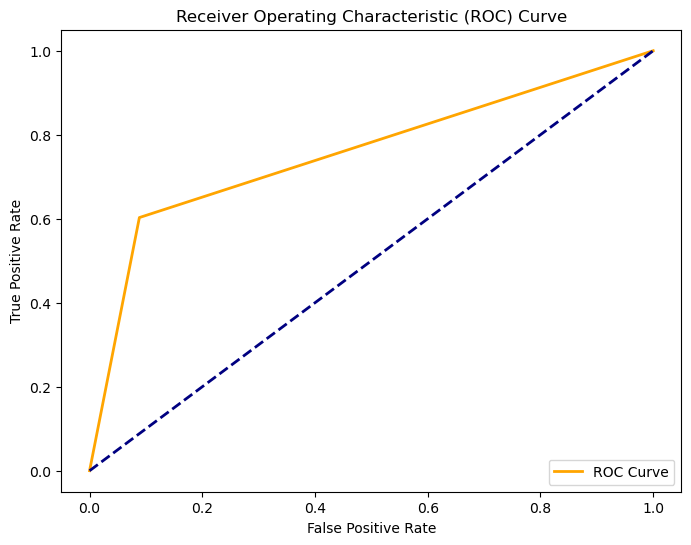

In [99]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, predictions)
print("AUC-ROC Score:", roc_auc)
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [101]:
from sklearn.metrics import log_loss
# Calculate log loss
logloss = log_loss(y_test, predictions)
print("Log Loss:", logloss)

Log Loss: 6.453390637319042


In [103]:
from sklearn.metrics import matthews_corrcoef
# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, predictions)
print("Matthews Correlation Coefficient:", mcc)

Matthews Correlation Coefficient: 0.5490589611447976


In [105]:
from sklearn.model_selection import cross_val_score
# Perform 10-fold cross-validation
scores = cross_val_score(log, x, y, cv=10)
print("Cross-Validation Mean Accuracy:", scores.mean())

Cross-Validation Mean Accuracy: 0.8164333462716178


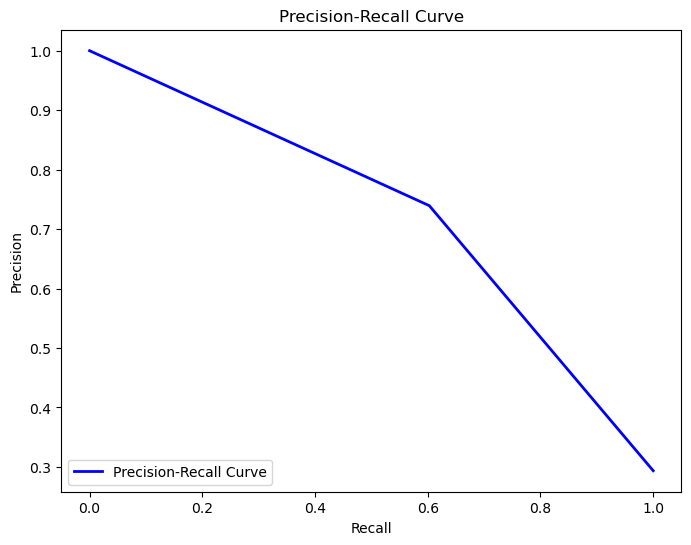

In [107]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [111]:
from sklearn.model_selection import train_test_split
# Use stratified sampling for train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [113]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameters to search
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
# Perform grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 100, 'penalty': 'l2'}


C:\Users\surek\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\surek\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\surek\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _

In [119]:
# Example of generating y_pred using a model (replace this with your actual prediction code)
y_pred = log.predict(X_test)
# Ensure y_pred has the same length as y_test
assert len(y_pred) == len(y_test), "Number of samples in y_pred and y_test must be the same."
# Now you can use the evaluation metrics without encountering the ValueError.

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Assuming y_pred and y_true are your predicted and true labels respectively
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
# F1-score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.8155998304366257
Precision: 0.7375643224699828
Recall: 0.6039325842696629
F1 Score: 0.6640926640926641
ROC-AUC Score: 0.7555182047031374


Confusion Matrix:
[[1494  153]
 [ 282  430]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1647
           1       0.74      0.60      0.66       712

    accuracy                           0.82      2359
   macro avg       0.79      0.76      0.77      2359
weighted avg       0.81      0.82      0.81      2359



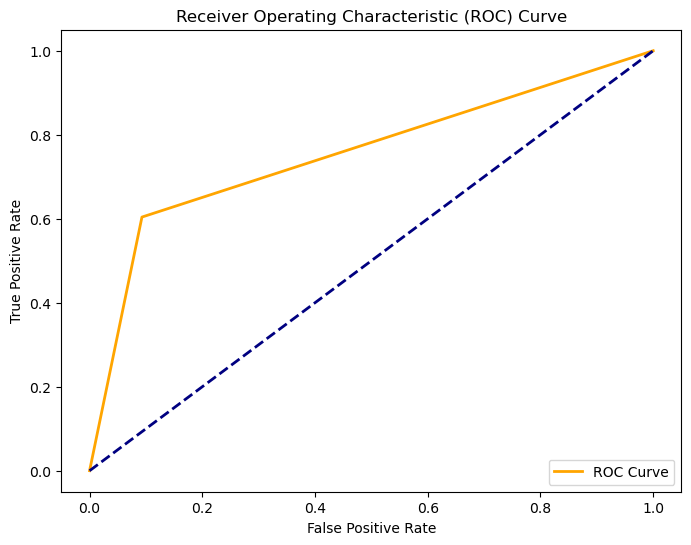

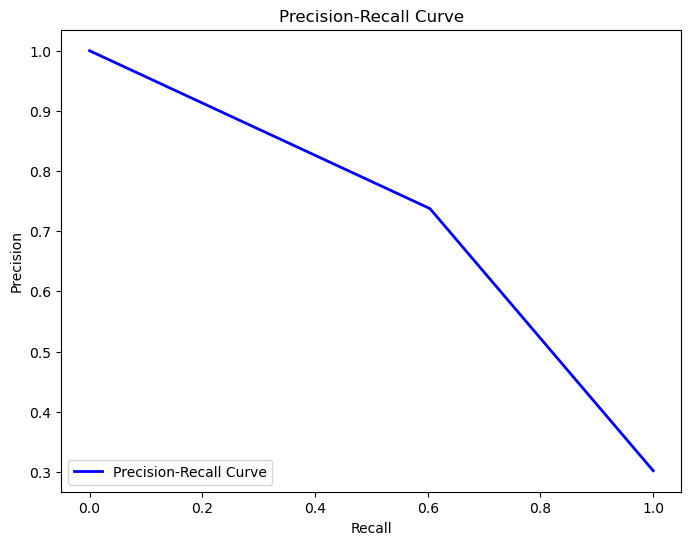

In [123]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Define the hyperparameters and values to tune
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
# Create a logistic regression model
logreg = LogisticRegression()
# Instantiate GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5)
# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
# Get the best model

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}


C:\Users\surek\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\surek\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\surek\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _

In [129]:
best_logreg = grid_search.best_estimator_
# Evaluate the best model
predictions = best_logreg.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy with Best Model:", accuracy)

Accuracy with Best Model: 0.8058499364137346


In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Define hyperparameters and their possible values
param_grid = {
'C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularization parameter
'penalty': ['l1', 'l2'], # Regularization type
'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'] # Solver for optimization
}
# Create a logistic regression model
logistic_regression = LogisticRegression()
# Create a grid search object with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

In [135]:
# Fit the grid search to your data
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
# Get the best model
best_model = grid_search.best_estimator_
# Evaluate the best model
y_pred = best_model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8050021195421789


C:\Users\surek\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\surek\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\surek\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = 